In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.data)

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

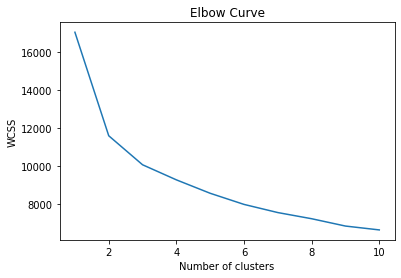

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [ ]:
distances = kmeans.transform(scaled_data)
anomaly_threshold = np.percentile(np.min(distances, axis=1), 95)
anomaly_indices = np.where(np.min(distances, axis=1) > anomaly_threshold)

In [ ]:
print(anomaly_indices)

(array([  3,   9,  12,  68,  71,  78, 108, 122, 146, 151, 152, 176, 180,
       190, 192, 212, 213, 265, 288, 290, 314, 318, 352, 368, 376, 379,
       461, 504, 505]),)
